In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical 
import tensorflow as tf

sns.set(style='white', context='notebook', palette='deep')

## 数据预处理

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


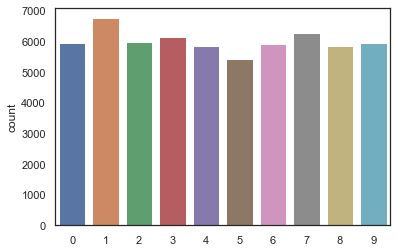

In [5]:
sns.countplot(y_train)

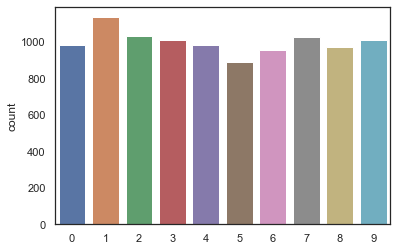

In [6]:
sns.countplot(y_test)

## 查看是否有nan值

In [7]:
np.isnan(x_train).any()

False

In [9]:
np.isnan(x_test).any()

False

## 正则化
使得CNN运行更快

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [17]:
x_train[:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## 转one-hot向量

In [6]:

y_train = to_categorical(y_train, num_classes = 10)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000,))

In [8]:
y_test1=to_categorical(y_test, num_classes = 10)

In [9]:
y_test1.shape

(10000, 10)

## 可视化

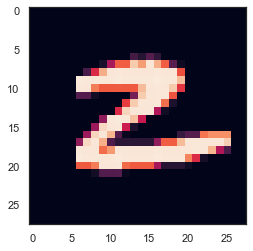

In [23]:
g = plt.imshow(x_train[189][:,:,0])

## CNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5),activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (5,5),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

In [21]:
from keras.optimizers import RMSprop,Adam
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer1=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
model.compile(optimizer = optimizer1 , loss = "categorical_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5,min_lr=0.00001)
epochs = 40
batch_size = 128

In [22]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,  featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  zca_whitening=False,  
        rotation_range=10,  zoom_range = 0.1, width_shift_range=0.1,  height_shift_range=0.1,  horizontal_flip=False,  vertical_flip=False) 
train_gen = datagen.flow(x_train,y_train, batch_size=batch_size)

In [70]:
model1 = Sequential()
model1.add(Conv2D(filters = 64, kernel_size = (5,5),activation ='relu', input_shape = (28,28,1)))
model1.add(BatchNormalization())
model1.add(Conv2D(filters = 64, kernel_size = (5,5),activation ='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(256, activation = "relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))
model1.add(Dense(10, activation = "softmax"))

In [72]:
from keras.callbacks import ReduceLROnPlateau
model1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5,min_lr=0.00001)
history1=model1.fit(train_gen,epochs = epochs,validation_data = (x_test,y_test1),verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size, callbacks=[learning_rate_reduction],validation_steps = x_test.shape[0] // batch_size)

Epoch 1/40
 - 173s - loss: 0.3680 - accuracy: 0.8847 - val_loss: 0.4336 - val_accuracy: 0.8721
Epoch 2/40
 - 175s - loss: 0.1120 - accuracy: 0.9664 - val_loss: 0.0279 - val_accuracy: 0.9916
Epoch 3/40
 - 171s - loss: 0.0795 - accuracy: 0.9769 - val_loss: 0.0255 - val_accuracy: 0.9916
Epoch 4/40
 - 176s - loss: 0.0662 - accuracy: 0.9806 - val_loss: 0.0295 - val_accuracy: 0.9904
Epoch 5/40
 - 179s - loss: 0.0610 - accuracy: 0.9827 - val_loss: 0.0334 - val_accuracy: 0.9900
Epoch 6/40
 - 175s - loss: 0.0537 - accuracy: 0.9845 - val_loss: 0.0224 - val_accuracy: 0.9929
Epoch 7/40
 - 175s - loss: 0.0463 - accuracy: 0.9866 - val_loss: 0.0370 - val_accuracy: 0.9886
Epoch 8/40
 - 173s - loss: 0.0464 - accuracy: 0.9865 - val_loss: 0.0293 - val_accuracy: 0.9911
Epoch 9/40
 - 171s - loss: 0.0424 - accuracy: 0.9876 - val_loss: 0.0207 - val_accuracy: 0.9936
Epoch 10/40
 - 169s - loss: 0.0407 - accuracy: 0.9884 - val_loss: 0.0247 - val_accuracy: 0.9932
Epoch 11/40
 - 173s - loss: 0.0400 - accuracy: 0.

In [23]:
history = model.fit(train_gen,
                              epochs = epochs,validation_data = (x_test,y_test1),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],
                             validation_steps = x_test.shape[0] // batch_size)

Epoch 1/40
 - 213s - loss: 0.1126 - accuracy: 0.9658 - val_loss: 0.0865 - val_accuracy: 0.9756
Epoch 2/40
 - 251s - loss: 0.0786 - accuracy: 0.9767 - val_loss: 0.0299 - val_accuracy: 0.9911
Epoch 3/40
 - 181s - loss: 0.0681 - accuracy: 0.9805 - val_loss: 0.0253 - val_accuracy: 0.9925
Epoch 4/40
 - 175s - loss: 0.0577 - accuracy: 0.9822 - val_loss: 0.0220 - val_accuracy: 0.9933
Epoch 5/40
 - 176s - loss: 0.0497 - accuracy: 0.9856 - val_loss: 0.0229 - val_accuracy: 0.9931
Epoch 6/40
 - 172s - loss: 0.0478 - accuracy: 0.9862 - val_loss: 0.0241 - val_accuracy: 0.9920
Epoch 7/40
 - 172s - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0209 - val_accuracy: 0.9941
Epoch 8/40
 - 171s - loss: 0.0424 - accuracy: 0.9871 - val_loss: 0.0196 - val_accuracy: 0.9947
Epoch 9/40
 - 168s - loss: 0.0410 - accuracy: 0.9878 - val_loss: 0.0258 - val_accuracy: 0.9916
Epoch 10/40
 - 165s - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.0159 - val_accuracy: 0.9943
Epoch 11/40
 - 171s - loss: 0.0387 - accuracy: 0.

In [26]:
pip install pydot

You should consider upgrading via the '/Users/wangwenqing/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install GraphViz

You should consider upgrading via the '/Users/wangwenqing/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


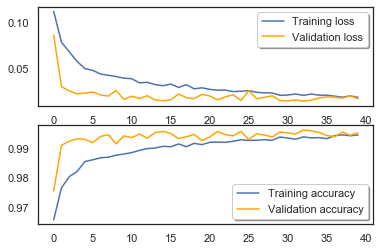

In [26]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

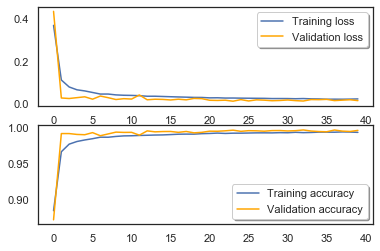

In [74]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history1.history['loss'], color='b', label="Training loss")
ax[0].plot(history1.history['val_loss'], color='orange', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history1.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history1.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

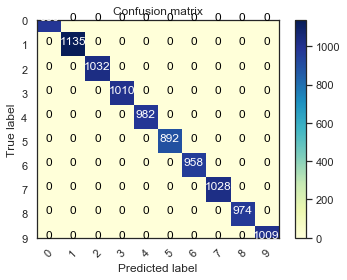

In [36]:
Y_pred = model.predict(x_test)

Y_pred_classes = np.argmax(y_test1,axis = 1) 

Y_true = np.argmax(y_test1,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [38]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test1,axis = 1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

In [76]:
Y_pred = model1.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test1,axis = 1)
confusion_mtx1 = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

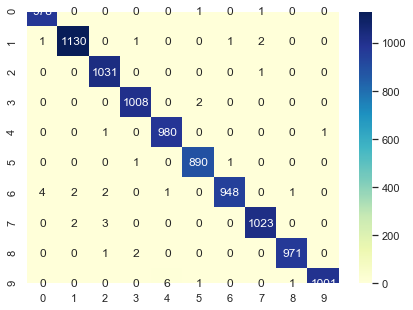

In [77]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_mtx1, annot=True,cmap='YlGnBu',fmt="d")

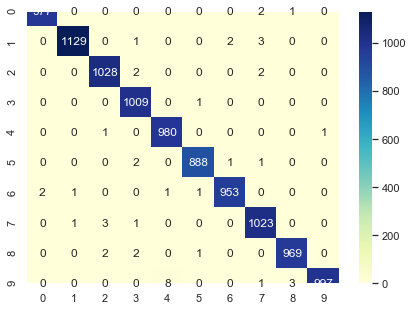

In [68]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_mtx, annot=True,cmap='YlGnBu',fmt="d")

In [67]:
pip --default-timeout=100 install matplotlib==3.1.2 -i http://pypi.douban.com/simple/ --trusted-host pypi.douban.com

Looking in indexes: http://pypi.douban.com/simple/
     |████████████████████████████████| 13.2 MB 2.2 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
You should consider upgrading via the '/Users/wangwenqing/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
